#Linear Algebra Applications Assignment





### Your data:

**chirps_per_sec** = chirps/sec for the striped ground cricket

**temperature** = temperature in degrees Fahrenheit

Reference: The Song of Insects by Dr.G.W. Pierce, Harvard College Press

In [0]:
!pip install xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr02.xls')
df = df.rename(columns={'X':'chirps_per_sec', 'Y':'temperature'})

print(df.shape)
df.head()

    100% |████████████████████████████████| 112kB 4.3MB/s 
*** No CODEPAGE record, no encoding_override: will use 'ascii'
(15, 2)


,chirps_per_sec,temperature
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


## 1) Graph a scatterplot of chirps_per_sec vs temperature 

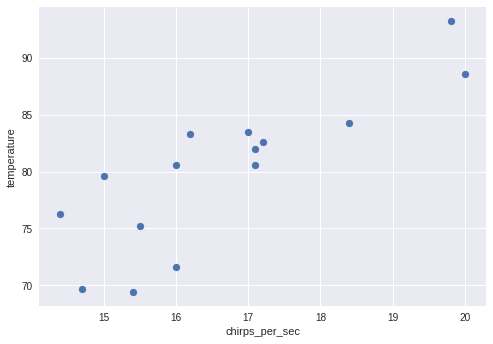

In [0]:
##### Your Code Here #####
plt.scatter(df['chirps_per_sec'], df['temperature'])
plt.xlabel('chirps_per_sec')
plt.ylabel('temperature')
plt.show()

## 2) Follow the steps below to compute the coefficients (intercept and slope) for the line of best fit:

## 2.1) Use np.ones to add a column of ones to the dataframe

In [0]:
##### Your Code Here #####
df['ones'] = np.ones(15)
df.head(15)



,chirps_per_sec,temperature,ones
0,20.000000,88.599998,1.0
1,16.000000,71.599998,1.0
2,19.799999,93.300003,1.0
3,18.400000,84.300003,1.0
4,17.100000,80.599998,1.0
5,15.500000,75.199997,1.0
6,14.700000,69.699997,1.0
7,17.100000,82.000000,1.0
8,15.400000,69.400002,1.0
9,16.200001,83.300003,1.0


## 2.2) Create your X matrix from the 'ones' and 'temperature' columns

In [0]:
##### Your Code Here #####
X = df[['ones', 'chirps_per_sec']].as_matrix()
print(X)


[[ 1.         20.        ]
 [ 1.         16.        ]
 [ 1.         19.79999924]
 [ 1.         18.39999962]
 [ 1.         17.10000038]
 [ 1.         15.5       ]
 [ 1.         14.69999981]
 [ 1.         17.10000038]
 [ 1.         15.39999962]
 [ 1.         16.20000076]
 [ 1.         15.        ]
 [ 1.         17.20000076]
 [ 1.         16.        ]
 [ 1.         17.        ]
 [ 1.         14.39999962]]


## 2.3) Create your Y vector from the chips_per_sec column. (Make sure that it is formatted as a column vector.)

In [0]:
##### Your Code Here #####
Y = df['temperature'].as_matrix().reshape(-1,1)
print(Y)

[[88.59999847]
 [71.59999847]
 [93.30000305]
 [84.30000305]
 [80.59999847]
 [75.19999695]
 [69.69999695]
 [82.        ]
 [69.40000153]
 [83.30000305]
 [79.59999847]
 [82.59999847]
 [80.59999847]
 [83.5       ]
 [76.30000305]]


In [0]:
# beta = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), Y))
# beta

## 2.4) Calculate X_transpose and print the result: $X^{T}$ 

In [0]:
##### Your Code Here #####
x_transpose = np.transpose(X)
x_transpose

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [20.        , 16.        , 19.79999924, 18.39999962, 17.10000038,
        15.5       , 14.69999981, 17.10000038, 15.39999962, 16.20000076,
        15.        , 17.20000076, 16.        , 17.        , 14.39999962]])

## 2.5) Calculate X_transpose_X and print the result: $X^{T}X$

In [0]:
##### Your Code Here #####
x_transpose_x = np.matmul(x_transpose, X)
print(x_transpose_x)

[[  15.          249.80000019]
 [ 249.80000019 4200.56000445]]


## 2.6) Calculate the inverse of X_transpose_X and print the result: $(X^{T}X)^{-1}$ 

In [0]:
##### Your Code Here #####
inverse_x_transpose_x = np.linalg.inv(x_transpose_x)
inverse_x_transpose_x

array([[ 6.90472779, -0.41061216],
       [-0.41061216,  0.02465645]])

## 2.7) An aside: Multiply the X_tranpose_X matrix against its inverse: $(X^{T}X)(X^{T}X)^{-1}$  Print the result. What is the name for the resulting matrix?

In [0]:
##### Your Code Here #####
ident = np.matmul(x_transpose_x, inverse_x_transpose_x)
ident

array([[1.00000000e+00, 5.27598130e-17],
       [7.69789543e-14, 1.00000000e+00]])

The resulting matrix is called a 2 by 2 Identity Matrix

## 2.8) Calculate X_transpose_Y and print the result: $X^{T}Y$

In [0]:
##### Your Code Here #####
x_transpose_y = np.matmul(x_transpose, Y)
x_transpose_y

array([[ 1200.59999845],
       [20127.47000262]])

## 2.9) Finally, calculate the Beta coefficients vector by multiplying the left and right halfs of the linear regression equation. Print the Beta vector: $\beta = (X^{T}X)^{-1} X^{T}Y$  
(You should have all of the parts to do this now)

In [0]:
##### Your Code Here #####
beta_coefficient =  np.matmul(inverse_x_transpose_x, x_transpose_y)
beta_coefficient

array([[25.23230498],
       [ 3.29109457]])

In [0]:
beta_0 = beta_coefficient[0,0]
beta_1 = beta_coefficient[1,0]
beta_0,beta_1


(25.23230498342673, 3.291094567947539)

## 3) Graph the line of best fit through the scatterplot of the data points

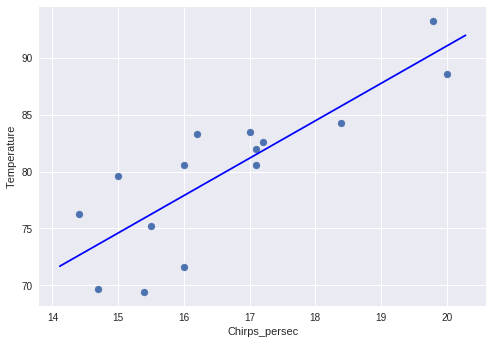

In [0]:
##### Your Code Here #####
plt.scatter(df['chirps_per_sec'], df['temperature'])
axes = plt.gca()
x_val = np.array(axes.get_xlim())
y_val2 = beta_0 + beta_1 * x_val
plt.plot(x_val, y_val2, '-', color='b')
plt.xlabel('Chirps_persec')
plt.ylabel('Temperature')
plt.show()

## 4) If a cricket has chirped 19 times in a second what is the predicted temperature? Plot this prediction as well.

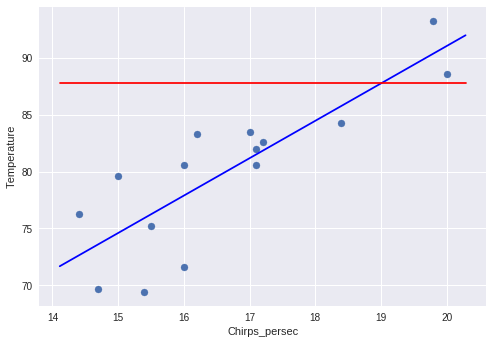

The predicted temperature is [87.76310177442997, 87.76310177442997]


In [0]:
# y = mx + b
plt.scatter(df['chirps_per_sec'], df['temperature'])
axes = plt.gca()
x_val = np.array(axes.get_xlim())
y_val2 = beta_0 + beta_1 * x_val
plt.plot(x_val, y_val2, '-', color='b')
y_val = [beta_1*19 + beta_0 for x in x_val]
plt.plot(x_val, y_val, '-', color = 'r')
plt.xlabel('Chirps_persec')
plt.ylabel('Temperature')
plt.show()
print(f'The predicted temperature is {y_val}')

##Stretch Problem
Let's add a 3rd dimension. 

X1 = systolic blood pressure

X2 = age in years

X3 = weight in pounds

Compute the coefficients for the **plane** of best fit for

$X_1 = \beta_1X_2 + \beta_2X_3 + \beta_0$

Then graph the plane in addition to the  datapoints in a **3D** graph.
An article to get you started on [3D graphing](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

In [0]:
s_data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
print(s_data.head())
s_data.shape

*** No CODEPAGE record, no encoding_override: will use 'ascii'
    X1  X2   X3
0  132  52  173
1  143  59  184
2  153  67  194
3  162  73  211
4  154  64  196


(11, 3)

In [0]:
s_data['ones'] = np.ones(11)
s_data.head(11)

,X1,X2,X3,ones
0,132,52,173,1.0
1,143,59,184,1.0
2,153,67,194,1.0
3,162,73,211,1.0
4,154,64,196,1.0
5,168,74,220,1.0
6,137,54,188,1.0
7,149,61,188,1.0
8,159,65,207,1.0
9,128,46,167,1.0


In [0]:
X = s_data[['ones', 'X2', 'X3']].as_matrix()
print(X)

[[  1.  52. 173.]
 [  1.  59. 184.]
 [  1.  67. 194.]
 [  1.  73. 211.]
 [  1.  64. 196.]
 [  1.  74. 220.]
 [  1.  54. 188.]
 [  1.  61. 188.]
 [  1.  65. 207.]
 [  1.  46. 167.]
 [  1.  72. 217.]]


In [0]:
# Z = s_data[['ones','X3']].as_matrix()
# print(Z)


In [0]:
Y = s_data['X1'].as_matrix().reshape(-1,1)
print(Y)

[[132]
 [143]
 [153]
 [162]
 [154]
 [168]
 [137]
 [149]
 [159]
 [128]
 [166]]


In [0]:
beta = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), Y))
beta

array([[30.99410295],
       [ 0.86141469],
       [ 0.3348592 ]])

In [0]:
# beta2 = np.matmul(np.linalg.inv(np.matmul(np.transpose(Z), Z)), np.matmul(np.transpose(Z), Y))
# beta2

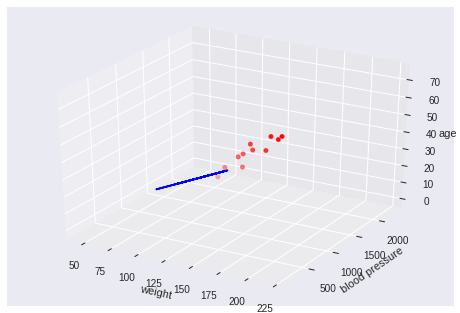

[1612.8896274049225, 1829.8483480712498, 2077.8011716899096, 2263.7657894039044, 1984.8188628329121, 2294.759892356237, 1674.8778333095875, 1891.8365539759147, 2015.8129657852446, 1426.9250096909277, 2232.771686451572] [5363.176084637151, 5704.111217112808, 6014.052246636133, 6540.951996825785, 6076.040452540798, 6819.898923396777, 5828.087628922138, 5828.087628922138, 6416.975585016455, 5177.211466923156, 6726.916614539779]


In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(s_data['X3'], s_data['X1'], s_data['X2'], c='r', marker='o')
ax.set_xlabel('weight')
ax.set_ylabel('blood pressure')
ax.set_zlabel('age')
x_v = s_data['X2']
z_v = s_data['X3']
y_v = [beta[0,0]* x + beta[1,0] + beta[2,0] for x in x_v]
y_v2 = [beta[0,0]* x + beta[1,0] + beta[2,0] for x in z_v]
ax.plot(x_v, y_v, c='b' )
plt.show();
print(y_v,y_v2)